# 1-1,结构化数据建模流程范例


## 一，准备数据


In [1]:
import os
import datetime

#打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

#mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader,TensorDataset

dftrain_raw = pd.read_csv('./data/titanic/train.csv')
dftest_raw = pd.read_csv('./data/titanic/test.csv')
dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


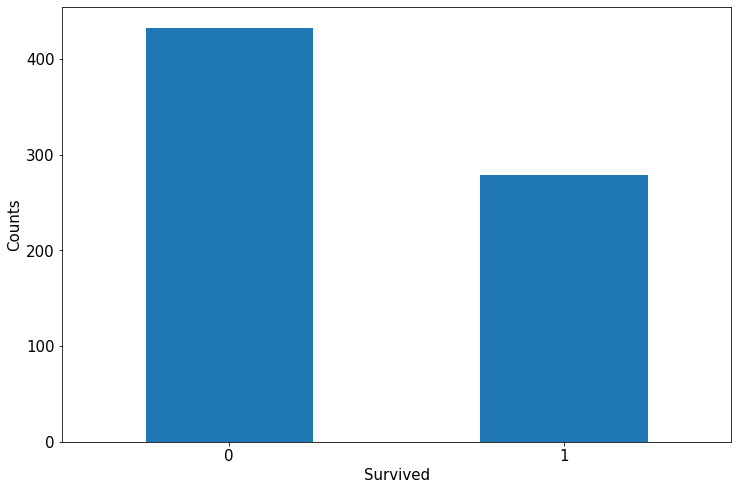

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

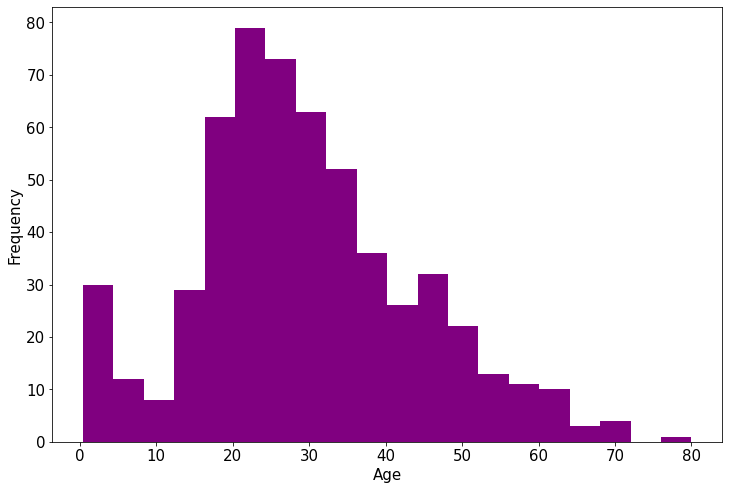

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

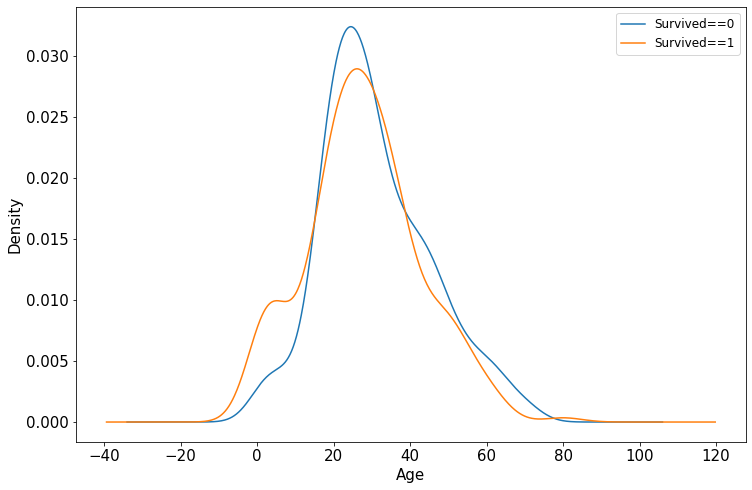

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [6]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw).values
y_train = dftrain_raw[['Survived']].values

x_test = preprocessing(dftest_raw).values
y_test = dftest_raw[['Survived']].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

print("y_train.shape =", y_train.shape )
print("y_test.shape =", y_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)
y_train.shape = (712, 1)
y_test.shape = (179, 1)


In [7]:
dl_train = DataLoader(TensorDataset(torch.tensor(x_train).float(),torch.tensor(y_train).float()),
                     shuffle = True, batch_size = 8)
dl_valid = DataLoader(TensorDataset(torch.tensor(x_test).float(),torch.tensor(y_test).float()),
                     shuffle = False, batch_size = 8)

In [8]:
# 测试数据管道
for features,labels in dl_train:
    print(features,labels)
    break

tensor([[  1.0000,   0.0000,   0.0000,   0.0000,   1.0000,  28.0000,   0.0000,
           0.0000,   0.0000,  47.1000,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,   0.0000,   1.0000,
           0.0000,   0.0000,   7.2250,   1.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,   0.0000,   1.0000,
           0.0000,   0.0000,   7.2292,   1.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  1.0000,   0.0000,   0.0000,   1.0000,   0.0000,  38.0000,   0.0000,
           0.0000,   0.0000, 227.5250,   0.0000,   1.0000,   0.0000,   0.0000,
           0.0000],
        [  0.0000,   1.0000,   0.0000,   1.0000,   0.0000,  26.0000,   0.0000,
           1.0000,   1.0000,  26.0000,   1.0000,   0.0000,   0.0000,   1.0000,
           0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000,   1.0000,  25.0000,   0.0000,
           0.0000,   0.0000,   

## 二，定义模型


In [9]:
def create_net():
    net = nn.Sequential()
    net.add_module("linear1", nn.Linear(15, 20))
    net.add_module("relu1", nn.ReLU())
    net.add_module("linear2", nn.Linear(20, 15))
    net.add_module("relu2", nn.ReLU())
    net.add_module("linear3", nn.Linear(15,1))
    net.add_module("sigmoid", nn.Sigmoid())
    return net
net = create_net()
print(net)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [10]:
from torchkeras import summary
summary(net,input_shape=(15,))

--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Linear-1                                    [-1, 20]                  320
ReLU-2                                      [-1, 20]                    0
Linear-3                                    [-1, 15]                  315
ReLU-4                                      [-1, 15]                    0
Linear-5                                     [-1, 1]                   16
Sigmoid-6                                    [-1, 1]                    0
Sequential-7                                 [-1, 1]                  651
Total params: 1,302
Trainable params: 1,302
Non-trainable params: 0
--------------------------------------------------------------------------
Input size (MB): 0.000057
Forward/backward pass size (MB): 0.000557
Params size (MB): 0.004967
Estimated Total Size (MB): 0.005581
-----------------------------------------------------------

'--------------------------------------------------------------------------\nLayer (type)                            Output Shape              Param #\n==========================================================================\nLinear-1                                    [-1, 20]                  320\nReLU-2                                      [-1, 20]                    0\nLinear-3                                    [-1, 15]                  315\nReLU-4                                      [-1, 15]                    0\nLinear-5                                     [-1, 1]                   16\nSigmoid-6                                    [-1, 1]                    0\nSequential-7                                 [-1, 1]                  651\n==========================================================================\nTotal params: 1,302\nTrainable params: 1,302\nNon-trainable params: 0\n--------------------------------------------------------------------------\nInput size (MB): 0.00005

## 三，训练模型


有3类典型的训练循环代码风格：
### 脚本形式训练循环
### 函数形式训练循环
### 类形式训练循环



In [12]:
from sklearn.metrics import accuracy_score


loss_func = nn.BCELoss() #这个是loss_funct 到底是什么???????
optimizer = torch.optim.Adam(params = net.parameters(), lr = 0.01) # lr = learning rate
metric_func = lambda y_pred, y_true: accuracy_score(y_true.data.numpy(), y_pred.data.numpy() > 0.5)
 #这个是metric_funct 到底是什么???????
metric_name = "accuracy" 

In [14]:
epochs = 10
log_step_freq = 30

dfhistory = pd.DataFrame(columns = ["epoch","loss", metric_name, "val_loss", "val_" + metric_name])
print("Start Training...")
nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("========"*8 + "%s"%nowtime)


for epoch in range(1, epochs + 1):
    # train loop
    net.train()
    loss_sum = 0.0
    metric_sum = 0.0
    step = 1
    for step, (features, labels) in enumerate(dl_train, 1):
        #梯度清零
        optimizer.zero_grad()

        #正向传播求损失
        predictions = net(features)  #feature是你的x
        loss = loss_func(predictions,labels)   #这个是loss function
        metric = metric_func(predictions, labels) #这个是metric function带出来

        #反向传播求梯度
        loss.backward()
        optimizer.step()


        #打印batch级别日志
        loss_sum += loss.item() #这个是loss function出来的item？ link nn.BCELoss
        metric_sum += metric.item()
        if (step % log_step_freq == 0):
            print(("[step = %d] loss: %.3f, "+metric_name+": %.3f") % (step, loss_sum/step, metric_sum/step))
    # 2 验证循环---------------------
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step, (features, labels) in enumerate(dl_valid, 1):
        #关闭梯度计算
        with torch.no_grad():
            predictions = net(features)
            val_loss = loss_func(predictions, labels)
            val_metric = metric_func(predictions, labels)
        val_loss_sum += val_loss.item()
        val_metric_sum += val_metric.item()
    
    # 3.记录日志
    info = (epoch, loss_sum / step, metric_sum / step,
            val_loss_sum/val_step, val_metric_sum/val_step)
    dfhistory.loc[epoch - 1] = info

    #打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f," + metric_name + \
        " = %.3f, val_loss = %.3f, " + "val_" + metric_name + " = %.3f") %info)
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n" + "============"*8 + "%s"%nowtime)


print('Finished Training...')


        

Start Training...
================================================================2022-05-30 22:18:22
[step = 30] loss: 0.495, accuracy: 0.767
[step = 60] loss: 0.505, accuracy: 0.777

EPOCH = 1, loss = 0.496,accuracy = 0.781, val_loss = 0.439, val_accuracy = 0.815

================================================================================================2022-05-30 22:18:22
[step = 30] loss: 0.456, accuracy: 0.804
[step = 60] loss: 0.491, accuracy: 0.787

EPOCH = 2, loss = 0.465,accuracy = 0.799, val_loss = 0.434, val_accuracy = 0.810

================================================================================================2022-05-30 22:18:22
[step = 30] loss: 0.493, accuracy: 0.779
[step = 60] loss: 0.508, accuracy: 0.771

EPOCH = 3, loss = 0.475,accuracy = 0.792, val_loss = 0.412, val_accuracy = 0.804

================================================================================================2022-05-30 22:18:22
[step = 30] loss: 0.426, accuracy: 0.808
[step = 60] lo

In [15]:
dfhistory 


,epoch,loss,accuracy,val_loss,val_accuracy
0,1.0,0.496082,0.780899,0.438946,0.815217
1,2.0,0.465354,0.799157,0.434124,0.809783
2,3.0,0.474821,0.792135,0.411818,0.804348
3,4.0,0.460516,0.793539,0.419182,0.798913
4,5.0,0.464034,0.800562,0.450889,0.804348
5,6.0,0.465109,0.804775,0.451218,0.798913
6,7.0,0.483068,0.778090,0.438017,0.788043
7,8.0,0.447209,0.807584,0.457815,0.815217
8,9.0,0.450458,0.799157,0.407167,0.809783
9,10.0,0.434839,0.818820,0.431892,0.820652


## 四.评估模型

In [16]:
dfhistory

,epoch,loss,accuracy,val_loss,val_accuracy
0,1.0,0.496082,0.780899,0.438946,0.815217
1,2.0,0.465354,0.799157,0.434124,0.809783
2,3.0,0.474821,0.792135,0.411818,0.804348
3,4.0,0.460516,0.793539,0.419182,0.798913
4,5.0,0.464034,0.800562,0.450889,0.804348
5,6.0,0.465109,0.804775,0.451218,0.798913
6,7.0,0.483068,0.778090,0.438017,0.788043
7,8.0,0.447209,0.807584,0.457815,0.815217
8,9.0,0.450458,0.799157,0.407167,0.809783
9,10.0,0.434839,0.818820,0.431892,0.820652


In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

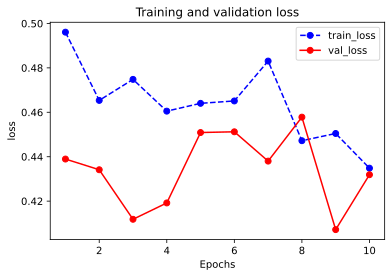

In [18]:
plot_metric(dfhistory,"loss")


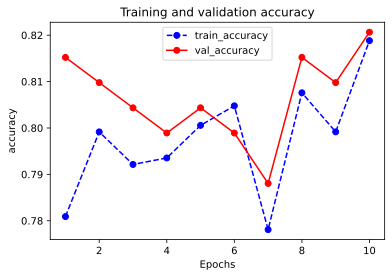

In [19]:
plot_metric(dfhistory,"accuracy")


## 五.使用模型

In [20]:
#预测概率
y_pred_probs = net(torch.tensor(x_test[0:10]).float()).data
y_pred_probs

tensor([[0.2558],
        [0.4711],
        [0.3935],
        [0.8546],
        [0.6429],
        [0.8287],
        [0.1050],
        [0.8546],
        [0.6434],
        [0.0594]])

In [21]:

#预测类别
y_pred = torch.where(y_pred_probs>0.5,
        torch.ones_like(y_pred_probs),torch.zeros_like(y_pred_probs))
y_pred

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]])

## 六.保存模型
Pytorch 有两种保存模型的方式，都是通过调用pickle序列化方法实现的。

第一种方法只保存模型参数。

第二种方法保存完整模型。

推荐使用第一种，第二种方法可能在切换设备和目录的时候出现各种问题。


### 1.保存模型参数（推荐）

In [22]:
print(net.state_dict().keys())


odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [23]:
# 保存模型参数

torch.save(net.state_dict(), "./data/net_parameter.pkl")

net_clone = create_net()
net_clone.load_state_dict(torch.load("./data/net_parameter.pkl"))

net_clone.forward(torch.tensor(x_test[0:10]).float()).data

tensor([[0.2558],
        [0.4711],
        [0.3935],
        [0.8546],
        [0.6429],
        [0.8287],
        [0.1050],
        [0.8546],
        [0.6434],
        [0.0594]])

### 保存完整模型（不推荐）

In [24]:
torch.save(net, './data/net_model.pkl')
net_loaded = torch.load('./data/net_model.pkl')
net_loaded(torch.tensor(x_test[0:10]).float()).data

tensor([[0.2558],
        [0.4711],
        [0.3935],
        [0.8546],
        [0.6429],
        [0.8287],
        [0.1050],
        [0.8546],
        [0.6434],
        [0.0594]])